<Figure size 1400x600 with 0 Axes>

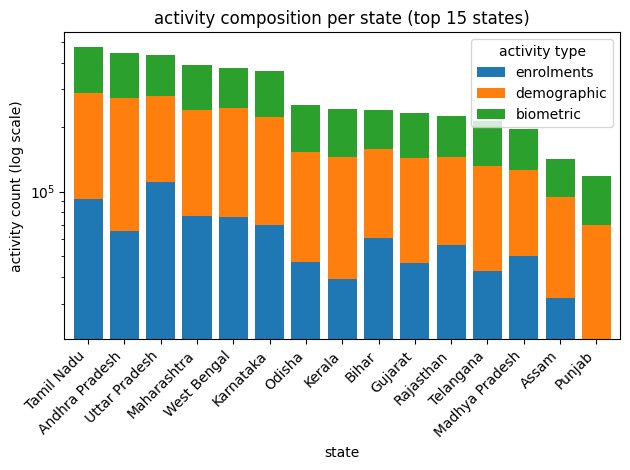

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
demographic_df=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
biometric_df=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

# aggregate
enrolments=enrolment_df.groupby("state").size()
demographic=demographic_df.groupby("state").size()
biometric=biometric_df.groupby("state").size()

activity=pd.DataFrame({
    "enrolments":enrolments,
    "demographic":demographic,
    "biometric":biometric
}).fillna(0)

# add total for sorting
activity["total"]=activity.sum(axis=1)

# keep top 15 states
activity_top=(
    activity
    .sort_values("total",ascending=False)
    .head(15)
    .drop(columns="total")
)

# plot
plt.figure(figsize=(14,6))

activity_top.plot(
    kind="bar",
    stacked=True,
    width=0.8
)

plt.yscale("log")
plt.xlabel("state")
plt.ylabel("activity count (log scale)")
plt.title("activity composition per state (top 15 states)")
plt.xticks(rotation=45,ha="right")
plt.legend(title="activity type")
plt.tight_layout()
plt.show()
